# Chapter 2 – End-to-end Machine Learning project

# Vorbereitung


In [92]:
#Angeben, unter welchen Systemvoraussetzungen das Notebook läuft

import numpy as np
import pandas as pd

import pickle

## Daten laden

In [93]:
import pickle

with open('datasets/housing_train_raw.pickle', 'rb') as f:
    housing_train_data = pickle.load(f)

# Testen, ob alles gut gegangen ist
housing_train_data[:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16118,-118.28,34.05,28.0,1306.0,637.0,2079.0,598.0,1.4615,<1H OCEAN
11972,-122.06,37.37,18.0,3058.0,661.0,1377.0,675.0,6.1299,<1H OCEAN
15699,-117.31,34.03,9.0,1199.0,187.0,629.0,207.0,5.7393,INLAND
10870,-122.04,37.60,17.0,3314.0,638.0,1873.0,602.0,4.3875,NEAR BAY
19055,-118.52,34.28,33.0,1975.0,271.0,801.0,287.0,7.8193,<1H OCEAN
9519,-118.30,33.79,9.0,2782.0,884.0,1790.0,748.0,2.9154,<1H OCEAN
3645,-118.03,33.77,21.0,3803.0,898.0,1511.0,829.0,3.0000,<1H OCEAN
13500,-122.02,37.58,15.0,3052.0,760.0,2097.0,728.0,3.3617,NEAR BAY
16699,-116.47,34.07,22.0,5473.0,1234.0,2581.0,1098.0,1.9375,INLAND
8615,-122.04,36.96,42.0,538.0,107.0,200.0,104.0,2.1667,NEAR OCEAN


# Daten vorbereiten für  Algorithmen des Maschinellen Lernens

## Schritt 1:  Fehlende Werte reparieren

###  Zeilen mit Nullwerten näher untersuchen

In [94]:
# Wir machen uns eine Kopie des Datensatzes um die Behandlung der Null-Werte näher zu untersuchen.
housing_train2 = housing_train_data.copy()
housing_train2.iloc[0,0]=pd.NA # um den Punkt besser zu demonstrieren, habe ich noch ein NaN in der Spalte Longitude dazugemogelt

In [95]:
housing_train2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16118,NaN,34.05,28.0,1306.0,637.0,2079.0,598.0,1.4615,<1H OCEAN
11972,-122.06,37.37,18.0,3058.0,661.0,1377.0,675.0,6.1299,<1H OCEAN
15699,-117.31,34.03,9.0,1199.0,187.0,629.0,207.0,5.7393,INLAND
10870,-122.04,37.60,17.0,3314.0,638.0,1873.0,602.0,4.3875,NEAR BAY
19055,-118.52,34.28,33.0,1975.0,271.0,801.0,287.0,7.8193,<1H OCEAN


In [96]:

housing_train2[housing_train2.isnull().any(axis=1) ]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16118,NaN,34.05,28.0,1306.0,637.0,2079.0,598.0,1.4615,<1H OCEAN
12313,-119.30,36.57,32.0,728.0,NaN,461.0,149.0,3.0156,INLAND
20088,-119.73,36.83,8.0,3602.0,NaN,1959.0,580.0,5.3478,INLAND
16478,-122.00,37.36,17.0,2070.0,NaN,797.0,275.0,8.6155,<1H OCEAN
14608,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
5152,-117.22,34.11,26.0,2972.0,NaN,1972.0,532.0,2.0388,INLAND
9000,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,NEAR OCEAN
4091,-122.41,38.16,37.0,1549.0,NaN,863.0,275.0,2.7457,NEAR BAY
9750,-117.14,32.90,16.0,3217.0,NaN,2054.0,687.0,4.2234,<1H OCEAN


In [97]:
null_rows_idx = housing_train2.isnull().any(axis=1)
housing_nur_nans =housing_train2[null_rows_idx]
housing_nur_nans

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16118,NaN,34.05,28.0,1306.0,637.0,2079.0,598.0,1.4615,<1H OCEAN
12313,-119.30,36.57,32.0,728.0,NaN,461.0,149.0,3.0156,INLAND
20088,-119.73,36.83,8.0,3602.0,NaN,1959.0,580.0,5.3478,INLAND
16478,-122.00,37.36,17.0,2070.0,NaN,797.0,275.0,8.6155,<1H OCEAN
14608,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
5152,-117.22,34.11,26.0,2972.0,NaN,1972.0,532.0,2.0388,INLAND
9000,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,NEAR OCEAN
4091,-122.41,38.16,37.0,1549.0,NaN,863.0,275.0,2.7457,NEAR BAY
9750,-117.14,32.90,16.0,3217.0,NaN,2054.0,687.0,4.2234,<1H OCEAN


In [98]:
# Die Untermenge der Hauspreise des Trainingsdatensatzes, wobei die zugehörigen Daten nans enthalten
# Von dieser Untermenge könnte man auch die Labels erhalten, wenn die Labels denn in diesem Notebook importiert gewesen wären
#housing_train_labels_nur_nans =housing_train_labels[null_rows_idx]


In [99]:
housing_train2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16511.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000
mean,-119.566389,35.629479,28.537670,2638.848898,539.054315,1428.942103,500.384145,3.871315
std,2.006914,2.140044,12.600313,2191.141942,425.418525,1150.885598,386.096704,1.897445
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1442.000000,295.000000,784.000000,279.000000,2.565075
50%,-118.490000,34.255000,29.000000,2120.500000,434.000000,1165.000000,408.000000,3.535450
75%,-118.000000,37.710000,37.000000,3149.000000,648.000000,1728.250000,606.000000,4.742725
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


### Wahlmöglichkeiten überlegen

In [100]:
# Wir haben 4 Optionen
# Option1: Zeile löschen
# Option2: Spalte löschen
# Option3: Ersatzwert berechnen, z.B Mittelwert,Median, Modus, constant ,z.B.42
# Option4: alle Daten auf Regelmäßigkeit untersuchen, Ersatzwert berechnen
# Wir spielen die ersten Optionen anhand einer Kopie der Daten durch.


### Option1 und 2: Löschen

In [101]:
# Option 1 
housing_ohne_NullZeilen = housing_train2.dropna(subset=["total_bedrooms"])  
print("Nach dem Löschen der Zeilen")
housing_ohne_NullZeilen.loc[null_rows_idx].head()

Nach dem Löschen der Zeilen


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16118,NaN,34.05,28.0,1306.0,637.0,2079.0,598.0,1.4615,<1H OCEAN


In [102]:
# Option 2
housing_ohne_NullSpalte =housing_train2.drop("total_bedrooms", axis=1)  
print("Nach dem Löschen der Spalte")
housing_ohne_NullSpalte.head()

Nach dem Löschen der Spalte


,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
16118,NaN,34.05,28.0,1306.0,2079.0,598.0,1.4615,<1H OCEAN
11972,-122.06,37.37,18.0,3058.0,1377.0,675.0,6.1299,<1H OCEAN
15699,-117.31,34.03,9.0,1199.0,629.0,207.0,5.7393,INLAND
10870,-122.04,37.60,17.0,3314.0,1873.0,602.0,4.3875,NEAR BAY
19055,-118.52,34.28,33.0,1975.0,801.0,287.0,7.8193,<1H OCEAN


### Fehlende Werte ersetzen

### Fehlende Werte reparieren:  NICHT mit pandas

In [103]:
# Den fehlenden Wert durch den Median mit Hilfe von pandas ersetzen

median_bedrooms = housing_train2["total_bedrooms"].median()

housing_train2["total_bedrooms"] = housing_train2["total_bedrooms"].fillna(median_bedrooms)  # option 3

housing_train2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16118,NaN,34.05,28.0,1306.0,637.0,2079.0,598.0,1.4615,<1H OCEAN
12313,-119.30,36.57,32.0,728.0,434.0,461.0,149.0,3.0156,INLAND
20088,-119.73,36.83,8.0,3602.0,434.0,1959.0,580.0,5.3478,INLAND
16478,-122.00,37.36,17.0,2070.0,434.0,797.0,275.0,8.6155,<1H OCEAN
14608,-124.06,40.86,34.0,4183.0,434.0,1891.0,669.0,3.2216,NEAR OCEAN


In [104]:
housing_train2["total_bedrooms"] = housing_train2["total_bedrooms"].fillna(median_bedrooms)  # option 3

housing_train2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16118,NaN,34.05,28.0,1306.0,637.0,2079.0,598.0,1.4615,<1H OCEAN
12313,-119.30,36.57,32.0,728.0,434.0,461.0,149.0,3.0156,INLAND
20088,-119.73,36.83,8.0,3602.0,434.0,1959.0,580.0,5.3478,INLAND
16478,-122.00,37.36,17.0,2070.0,434.0,797.0,275.0,8.6155,<1H OCEAN
14608,-124.06,40.86,34.0,4183.0,434.0,1891.0,669.0,3.2216,NEAR OCEAN


### Fehlende Werte reparieren: besser mit scikit-learn !

###### geeignete Arbeitsmittel bereit stellen

In [105]:
# lückenhafte Datensätze löschen: Pandas eignet sich gut
# Lücken durch neue Werte ersetzen: Dies sollte man nicht mit pandas machen

# scikit-learn enthält mehrere Klassen, die fehlende Werte auf raffinierte Weise ersetzen können.
# Sie heißen Imputer. Ihre Anwendung folgt einem Schema.

In [106]:
# Imputer arbeiten nur auf numerischen Spalten, aber nicht auf Spalten , die Strings enthalten.
# Wir machen uns eine Kopie der Numerischen Spalten, die im Trainingsdatensatz sind.
housing_num = housing_train_data[['longitude','latitude','housing_median_age','total_rooms',
                                     'total_bedrooms','population','households','median_income']]
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16118,-118.28,34.05,28.0,1306.0,637.0,2079.0,598.0,1.4615
11972,-122.06,37.37,18.0,3058.0,661.0,1377.0,675.0,6.1299
15699,-117.31,34.03,9.0,1199.0,187.0,629.0,207.0,5.7393
10870,-122.04,37.60,17.0,3314.0,638.0,1873.0,602.0,4.3875
19055,-118.52,34.28,33.0,1975.0,271.0,801.0,287.0,7.8193


In [107]:
type(housing_num)

pandas.core.frame.DataFrame

Objekt Orientierte Programmierung (OOP):
Eine Klasse ist der Bauplan für ein Objekt. Eine Instanz wird jedes mal neu erzeugt, sprich initialisiert in Python Code mit instance = new ObjectOfClass(*args)

Jede Instanz ist quasi individuell zu nutzen und erhält dieselben Methoden und Attribute die in der Klasse vordefiniert wurden. Ist aber eine eigenständige "Instanz" und referenziert auf ein Objekt, welcher einen eigenen Speicher zugewiesen bekommt.


###### Der Imputer arbeitet

In [108]:
from sklearn.impute import SimpleImputer 

imputer = SimpleImputer(strategy = "median")
imputer

SimpleImputer(strategy='median')

In [109]:
imputer.fit(X=housing_num,y=None)# Daten sind Trainingsdaten

SimpleImputer(strategy='median')

In [110]:
ergebnis_imputer = imputer.transform(housing_num)# Daten sind Trainingsdaten
ergebnis_imputer

array([[-1.1828e+02,  3.4050e+01,  2.8000e+01, ...,  2.0790e+03,
         5.9800e+02,  1.4615e+00],
       [-1.2206e+02,  3.7370e+01,  1.8000e+01, ...,  1.3770e+03,
         6.7500e+02,  6.1299e+00],
       [-1.1731e+02,  3.4030e+01,  9.0000e+00, ...,  6.2900e+02,
         2.0700e+02,  5.7393e+00],
       ...,
       [-1.1759e+02,  3.4160e+01,  1.0000e+01, ...,  3.8190e+03,
         1.1220e+03,  7.8252e+00],
       [-1.1973e+02,  3.4430e+01,  2.7000e+01, ...,  9.7800e+02,
         3.3800e+02,  2.3030e+00],
       [-1.2163e+02,  4.0920e+01,  2.3000e+01, ...,  8.7200e+02,
         3.5000e+02,  2.2337e+00]])

In [111]:
type(ergebnis_imputer)

numpy.ndarray

In [112]:
#Alternative
imputer3 = SimpleImputer(strategy="most_frequent")
imputer3.fit(housing_num)# Daten sind Trainingsdaten
ergebnis_imputer3 = imputer3.transform(housing_num)

###### Welche Informationen speichert der Imputer über sich selbst ?

In [113]:
# Welche Strategie hat der Imputer angewandt? 
imputer.strategy

'median'

In [114]:
#Welche Werte hat der Imputer berechnet, während die Funktion fit ausgeführt wurde?
imputer.statistics_

array([-118.49  ,   34.255 ,   29.    , 2120.5   ,  434.    , 1165.    ,
        408.    ,    3.5354])

In [115]:
housing_num.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000
mean,-119.566311,35.629479,28.537670,2638.848898,539.054315,1428.942103,500.384145,3.871315
std,2.006879,2.140044,12.600313,2191.141942,425.418525,1150.885598,386.096704,1.897445
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1442.000000,295.000000,784.000000,279.000000,2.565075
50%,-118.490000,34.255000,29.000000,2120.500000,434.000000,1165.000000,408.000000,3.535450
75%,-118.000000,37.710000,37.000000,3149.000000,648.000000,1728.250000,606.000000,4.742725
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [116]:
# Zu welchen Spalten gehören diese Mittelwerte?
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

###### Das Ergebnis des Imputers in einen pandas.DataFrame zurückverwandeln

In [117]:
housing_tr = pd.DataFrame(ergebnis_imputer, columns=imputer.feature_names_in_,
                          index=housing_num.index)
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
16118,-118.28,34.05,28.0,1306.0,637.0,2079.0,598.0,1.4615
12313,-119.30,36.57,32.0,728.0,434.0,461.0,149.0,3.0156
20088,-119.73,36.83,8.0,3602.0,434.0,1959.0,580.0,5.3478
16478,-122.00,37.36,17.0,2070.0,434.0,797.0,275.0,8.6155
14608,-124.06,40.86,34.0,4183.0,434.0,1891.0,669.0,3.2216


## Schritt 2:  Text durch Zahlen ersetzen 

Das folgende gilt nicht nur für Spalten mit Text, sondern auch für alle anderen Spalten mit kategorialen Dateninhalten

###### geeignete Arbeitsmittel bereit stellen

In [118]:
# Wir isolieren die Spalte, die den Text enthält
housing_cat = housing_train_data[["ocean_proximity"]]
#housing_cat = housing_train_data[["ocean_proximity", "ausstattung"]]
housing_cat.head(12)

,ocean_proximity
16118,<1H OCEAN
11972,<1H OCEAN
15699,INLAND
10870,NEAR BAY
19055,<1H OCEAN
9519,<1H OCEAN
3645,<1H OCEAN
13500,NEAR BAY
16699,INLAND
8615,NEAR OCEAN


### Text durch  Zahlen ersetzen. Die Zahlen werden einer Skala (Treppe) entnommen.

###### der Encoder arbeitet

In [119]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
# ordinal_encoder = OrdinalEncoder([[Inland,<1H, .....],["schlecht","mittel","gut"]])
ordinal_encoder.fit(housing_cat)
ergebnis_encoder = ordinal_encoder.transform(housing_cat)
ergebnis_encoder

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [4.],
       [1.]])

In [120]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder2 = OrdinalEncoder(categories =[ ['INLAND','<1H OCEAN','X', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'] ])
ordinal_encoder2.fit(housing_cat)   
ergebnis_encoder2 = ordinal_encoder2.transform(housing_cat)

In [121]:
ergebnis_encoder3 = ordinal_encoder2.transform(housing_cat)

In [122]:
ordinal_encoder2.categories_

[array(['INLAND', '<1H OCEAN', 'X', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'],
       dtype=object)]

###### Ergebnisse der Arbeit  ansehen

In [123]:
housing_cat.head(12)

,ocean_proximity
16118,<1H OCEAN
11972,<1H OCEAN
15699,INLAND
10870,NEAR BAY
19055,<1H OCEAN
9519,<1H OCEAN
3645,<1H OCEAN
13500,NEAR BAY
16699,INLAND
8615,NEAR OCEAN


In [124]:
# Die umgeformte Menge
ergebnis_encoder[6:12]

array([[0.],
       [3.],
       [1.],
       [4.],
       [1.],
       [1.]])

In [125]:
# Die umgeformte Menge
ergebnis_encoder[:6]

array([[0.],
       [0.],
       [1.],
       [3.],
       [0.],
       [0.]])

In [126]:
#Welche Werte hat der Imputer berechnet, während die Funktion fit ausgeführt wurde?
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Alternative :Text durch  One-Hot-Spalten ersetzen

###### der Encoder arbeitet

In [127]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
cat_encoder.fit(housing_cat)
ergebnis_1hot = cat_encoder.transform(housing_cat)

###### Ergebnisse der Arbeit  ansehen

In [128]:
ergebnis_1hot
#dense matrix : normal
# sparse matrix: enthält überwiegend 0

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [129]:
#Wenn wir das Ergebnis ansehen wollen, 
#müssen wir es aus der komprimierten Form in einen normalen array zurückverwandeln.
print("Originaldaten\n",housing_cat[:8])
print("umgeformte daten\n",ergebnis_1hot.toarray()[:8])

Originaldaten
       ocean_proximity
16118       <1H OCEAN
11972       <1H OCEAN
15699          INLAND
10870        NEAR BAY
19055       <1H OCEAN
9519        <1H OCEAN
3645        <1H OCEAN
13500        NEAR BAY
umgeformte daten
 [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]


In [130]:
# Wenn man den OneHotEncoder gleich ohne Kompression ansetzt, braucht man 
# den Parameter "sparse" oder "sparse_output". 
# Der Parameter hängt von der installierten Version ab.
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [131]:
# Wie hat der Encoder den Aufbau der Spalten organisiert?
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Schritt 3: Skalieren

In [132]:
#print(np.get_printoptions())
np.set_printoptions(threshold=10,precision =4)

###### der MinMaxScaler arbeitet

In [133]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
#min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

min_max_scaler.fit(housing_num)
housing_num_min_max_scaled = min_max_scaler.transform(housing_num)
ergebnis_scaler = min_max_scaler.transform(housing_num)

print("Original\n",housing_num[:8])
print("skaliert\n",housing_num_min_max_scaled[:8])

Original
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16118    -118.28     34.05                28.0       1306.0           637.0   
11972    -122.06     37.37                18.0       3058.0           661.0   
15699    -117.31     34.03                 9.0       1199.0           187.0   
10870    -122.04     37.60                17.0       3314.0           638.0   
19055    -118.52     34.28                33.0       1975.0           271.0   
9519     -118.30     33.79                 9.0       2782.0           884.0   
3645     -118.03     33.77                21.0       3803.0           898.0   
13500    -122.02     37.58                15.0       3052.0           760.0   

       population  households  median_income  
16118      2079.0       598.0         1.4615  
11972      1377.0       675.0         6.1299  
15699       629.0       207.0         5.7393  
10870      1873.0       602.0         4.3875  
19055       801.0       287.0         7.819

###### alternativ: der StandardScaler arbeitet

In [134]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)
ergebnis_std_scaler    = std_scaler.fit_transform(housing_num)

print("Original\n",housing_num[:4])
print("skaliert\n",housing_num_std_scaled[:8])

Original
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16118    -118.28     34.05                28.0       1306.0           637.0   
11972    -122.06     37.37                18.0       3058.0           661.0   
15699    -117.31     34.03                 9.0       1199.0           187.0   
10870    -122.04     37.60                17.0       3314.0           638.0   

       population  households  median_income  
16118      2079.0       598.0         1.4615  
11972      1377.0       675.0         6.1299  
15699       629.0       207.0         5.7393  
10870      1873.0       602.0         4.3875  
skaliert
 [[ 0.641  -0.7381 -0.0427 ...  0.5648  0.2528 -1.2701]
 [-1.2426  0.8133 -0.8363 ... -0.0451  0.4523  1.1904]
 [ 1.1243 -0.7474 -1.5506 ... -0.6951 -0.7599  0.9845]
 ...
 [ 0.631  -0.8596 -1.5506 ...  0.3137  0.6414 -0.5038]
 [ 0.7655 -0.8689 -0.5982 ...  0.0713  0.8511 -0.4592]
 [-1.2227  0.9115 -1.0744 ...  0.5805  0.5895 -0.2686]]


In [135]:
a=np.array([1,1,1,1,4,4,4,10]).reshape(8,-1)
#a =np.array(np.random.normal(loc=5, scale = 1, size=(8,1))                            )
scaler=std_scaler
skaliert=scaler.fit_transform(a)
skaliert.sort()
skaliert
#vars(scaler)

array([[-0.7746],
       [-0.7746],
       [-0.7746],
       [-0.7746],
       [ 0.2582],
       [ 0.2582],
       [ 0.2582],
       [ 2.3238]])

In [136]:
from sklearn.preprocessing import RobustScaler

# Using the Robust scaler
a=np.array([1,1,1,1,4,4,4,10]).reshape(8,-1)
robust_scaler = RobustScaler()
skaliert_robust = robust_scaler.fit_transform(a)
skaliert_robust.sort(axis=0)
skaliert_robust


array([[-0.5],
       [-0.5],
       [-0.5],
       [-0.5],
       [ 0.5],
       [ 0.5],
       [ 0.5],
       [ 2.5]])

#### Schritt 4: Angepasste Transformer einsetzen

### Hier wird gezeigt, wie man Transformer selbst schreiben kann

#### Beispiel 1. Eine Spalte mit Hilfe de Logarithmusfunktion umformen

        Original Logarithmisch umgeformt
      population              population
16118     2079.0                7.639642
11972     1377.0                7.227662
15699      629.0                6.444131
10870     1873.0                7.535297
19055      801.0                6.685861
...          ...                     ...
5892        27.0                3.295837
18724     1904.0                7.551712
5713      3819.0                8.247744
6744       978.0                6.885510
4654       872.0                6.770789

[16512 rows x 2 columns]


array([[<Axes: title={'center': 'population'}>]], dtype=object)

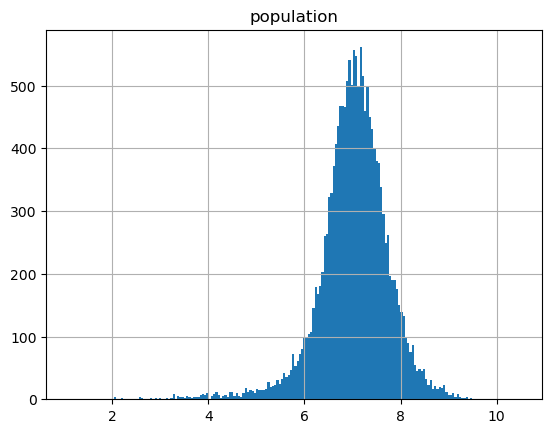

In [137]:
from sklearn.preprocessing import FunctionTransformer
housing = housing_num
log_transformer = FunctionTransformer(func =np.log, inverse_func=np.exp)
population_logarithmisch = log_transformer.transform(housing[["population"]])
anzeige = pd.concat((housing[["population"]],population_logarithmisch),axis=1, keys=["Original","Logarithmisch umgeformt"])
print(anzeige)
anzeige["Logarithmisch umgeformt"].hist(bins=200)


In [138]:
def f(X):
    return X.iloc[:, 0]/X.iloc[:,1]
verhältnis_transformer = FunctionTransformer(func = f)

In [139]:
verhältnis_transformer = FunctionTransformer(func = lambda X:X.iloc[:, 0]/X.iloc[:,1] )

population_geteilt = verhältnis_transformer.transform(housing_num[["population", "households"]])
population_geteilt = pd.DataFrame(population_geteilt,columns= ["persons_per_house"])

anzeige0 = pd.concat((housing[["population", "households"]],population_geteilt),
                    axis=1, keys=["Original","transformiert"])
anzeige0

Original                transformiert
      population households persons_per_house
16118     2079.0      598.0          3.476589
11972     1377.0      675.0          2.040000
15699      629.0      207.0          3.038647
10870     1873.0      602.0          3.111296
19055      801.0      287.0          2.790941
...          ...        ...               ...
5892        27.0       39.0          0.692308
18724     1904.0      647.0          2.942813
5713      3819.0     1122.0          3.403743
6744       978.0      338.0          2.893491
4654       872.0      350.0          2.491429

[16512 rows x 3 columns]

array([[<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>]], dtype=object)

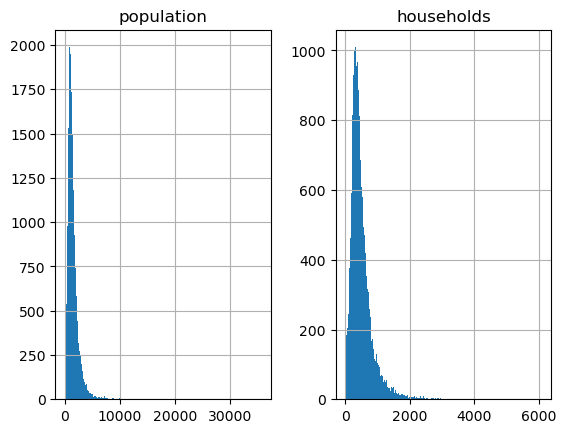

In [140]:
anzeige0["Original"].hist(bins=200)

#### Beispiel 2: Mit den Datenwerten aus 2 Spalten eine neue Spalte berechnen
Hiermit können solche Funktionen, wie Bewohner pro Haushalt berechnet werden

#### Beispiel 3: eine eigene Transformerklasse schreiben
Hier zeigt das Beispiel wie ein Scaler intern funktioniert

In [141]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True): 
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        if self.with_mean:
            self.mean_ = X.mean(axis=0)
        else:
            self.mean_=0
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [142]:
arbeiter = StandardScalerClone(with_mean=False)
arbeiter.fit(X=ergebnis_imputer)
X_ohneLücken_skaliert = arbeiter.transform(X=ergebnis_imputer)

X_ohneLücken_skaliert = arbeiter.fit_transform(X=ergebnis_imputer)
arbeiter.get_params()


{'with_mean': False}

In [143]:
print(type(arbeiter.fit(X=ergebnis_imputer)))

<class '__main__.StandardScalerClone'>


In [144]:
type(arbeiter)

__main__.StandardScalerClone

In [145]:
arbeiter.with_mean

False

In [146]:
arbeiter.mean_

0

In [147]:
arbeiter.scale_

array([2.0068e+00, 2.1400e+00, 1.2600e+01, 2.1911e+03, 4.2343e+02,
       1.1509e+03, 3.8609e+02, 1.8974e+00])

In [148]:
rückgabe = arbeiter.fit(X=ergebnis_imputer)
arbeiter.scale_
print(type(rückgabe))
X_trans = arbeiter.fit(X=ergebnis_imputer).transform(X=ergebnis_imputer)
X_trans

<class '__main__.StandardScalerClone'>


array([[-58.9391,  15.9114,   2.2222, ...,   1.8065,   1.5489,   0.7703],
       [-60.8227,  17.4628,   1.4286, ...,   1.1965,   1.7483,   3.2307],
       [-58.4557,  15.902 ,   0.7143, ...,   0.5466,   0.5362,   3.0248],
       ...,
       [-58.5953,  15.9628,   0.7937, ...,   3.3184,   2.9061,   4.1242],
       [-59.6616,  16.0889,   2.1429, ...,   0.8498,   0.8755,   1.2138],
       [-60.6084,  19.1217,   1.8254, ...,   0.7577,   0.9065,   1.1773]])

#### Beispiel 4: eine eigene Transformerklasse schreiben
Hier schreiben wir eine Klasse, die Spalten hinzufügt, die sich aus den bisherigen Spalten berechnen lassen

In [149]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
housing = housing_num

class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, nummern_paare, neue_spaltennamen): 
        #spalten_paare ist eine Liste, die Paare von Spaltennummern enthält
        # Die Spalte mit der ersten Nummer wird später durch die Spalte mit der zweiten Nummer geteilt
        #Die erste Spalte in Zählerliste wird später geteilt durch die erste Nennung in Nennerliste
        # Dasselbe für alle weiteren Einträge
        self.nummern_paare = nummern_paare
        self.neue_spaltennamen = neue_spaltennamen
        
        
    def fit(self, X, y=None):        
        return self  # sonst passiert nichts
    
    def erzeuge_eine_neue_spalte(self,X,paar):
        #suche anhand der Zahlen die entsprechenden Spalten aus dem Datensatz X
        zähler_nr = paar[0]
        #print(X.shape)
        nenner_nr = paar[1]
        # teile die erste Spalte durch die zweite Spalte,um Verhältniszahlen zu bekommen
        neue_spalte = X[:,zähler_nr] / X[:,nenner_nr]
        return neue_spalte
        
    def transform(self, X, y=None):
        # Wir gehen davon aus, dass X kein DataFrame ist, sondern bereits ein numpy-Array
        X_neu = X
        for paar in self.nummern_paare:
            neue_spalte =self.erzeuge_eine_neue_spalte(X,paar)# erzeuge Spalte            
            X_neu = np.c_[X_neu, neue_spalte]#hänge spalte an die bisherigen Einträge von X an
       
        return X_neu

# Damit wir ganz sicher sind, lassen wir uns die Spaltennummer aus dem DataFrame berechnen
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")] 
print('Die Spaltennummern von "total_rooms", "total_bedrooms", "population", "households":',
        rooms_ix,bedrooms_ix,population_ix, household_ix)
            
       
# Die Instanz wird erzeugt
nummern_paare = [(bedrooms_ix,rooms_ix ),(population_ix,household_ix ),(rooms_ix,household_ix )]
liste_neue_spaltennamen = [ "bedroom_ratio","persons_per_house","rooms_per_house"]

#########################################################################
# Die Klasse wird getestet
print("Das gewählte Spaltenpaar",nummern_paare[2])
attr_adder = AttributesAdder(nummern_paare = nummern_paare,
                            neue_spaltennamen = liste_neue_spaltennamen )
# Die Instanz soll arbeiten

ergebnis_AttributesAdder = attr_adder.fit_transform(housing_num.to_numpy())
#print(ergebnis_AttributesAdder.shape)
# Zurückverwandlung des Transformationsergebnisses in einen DataFrame
columns_erweitert = list(housing_num)
columns_erweitert.extend(liste_neue_spaltennamen)
print(columns_erweitert)

df = pd.DataFrame(ergebnis_AttributesAdder,columns = columns_erweitert)
print("\nDataframe mit zusätzlicher Spalte")
df

Die Spaltennummern von "total_rooms", "total_bedrooms", "population", "households": 3 4 5 6
Das gewählte Spaltenpaar (3, 6)
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'bedroom_ratio', 'persons_per_house', 'rooms_per_house']

Dataframe mit zusätzlicher Spalte


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedroom_ratio,persons_per_house,rooms_per_house
0,-118.28,34.05,28.0,1306.0,637.0,2079.0,598.0,1.4615,0.487749,3.476589,2.183946
1,-122.06,37.37,18.0,3058.0,661.0,1377.0,675.0,6.1299,0.216154,2.040000,4.530370
2,-117.31,34.03,9.0,1199.0,187.0,629.0,207.0,5.7393,0.155963,3.038647,5.792271
3,-122.04,37.60,17.0,3314.0,638.0,1873.0,602.0,4.3875,0.192517,3.111296,5.504983
4,-118.52,34.28,33.0,1975.0,271.0,801.0,287.0,7.8193,0.137215,2.790941,6.881533
...,...,...,...,...,...,...,...,...,...,...,...
16507,-121.00,39.75,8.0,1116.0,214.0,27.0,39.0,2.5893,0.191756,0.692308,28.615385
16508,-119.20,34.15,27.0,2076.0,681.0,1904.0,647.0,1.4773,0.328035,2.942813,3.208655
16509,-117.59,34.16,10.0,9467.0,1181.0,3819.0,1122.0,7.8252,0.124749,3.403743,8.437611
16510,-119.73,34.43,27.0,1448.0,404.0,978.0,338.0,2.3030,0.279006,2.893491,4.284024


# Daten vorbereiten in einem Rutsch:Pipelines

## Einzelne Pipeline

Wir bauen eine Pipeline, die nacheinander alle Vorbereitungsschritte ausführt.

#### Die Pipeline wird initialisiert

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
#print("Argumente für den AttributesAdder",liste_neue_spaltennamen,end="\n\n")
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("spaltenergänzung", AttributesAdder(nummern_paare,liste_neue_spaltennamen )),
    
    ("pca",PCA()),
    ("standardize", StandardScaler())
    
])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('spaltenergänzung',
                 AttributesAdder(neue_spaltennamen=['bedroom_ratio',
                                                    'persons_per_house',
                                                    'rooms_per_house'],
                                 nummern_paare=[(4, 3), (5, 6), (3, 6)])),
                ('pca', PCA()), ('standardize', StandardScaler())])

#### Die Pipeline arbeitet

In [151]:
# Achtung: Hier müssen im Moment die Kommentare gesetzt bleiben, sonst gibt es weiter unten Chaos
# Alternative zur Zelle oben
#from sklearn.pipeline import make_pipeline

#num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [152]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
df_housing_num_prepared = pd.DataFrame(housing_num_prepared)                                    


#### Anzeige des Ergebnisses

In [153]:
housing_num_prepared[:6].round(2)
#print("Zeilen und Spalten von housing_prepared",housing_num_prepared.shape)
print("Anzahl der Originalspalten",housing_num.shape[1])
print("Anzahl derSpalten nach der Transformation",housing_num_prepared.shape[1])

Anzahl der Originalspalten 8
Anzahl derSpalten nach der Transformation 11


In [154]:
df_housing_num_prepared.head(6) 

,0,1,2,3,4,5,6,7,8,9,10
0,-0.350237,2.206730,1.267426,-0.542363,-0.404318,-0.201559,-0.384801,-0.264321,0.336629,-0.091234,3.737957
1,0.158472,-0.393963,0.836134,1.102548,-0.932558,0.232994,0.905878,0.498204,1.528205,-0.570204,0.404568
2,-0.688432,-0.194188,-0.444768,0.344485,-1.915879,0.127506,-0.987298,0.347269,0.604560,1.017579,-0.496301
3,0.328233,0.192445,-0.272354,0.019092,-0.856135,0.001656,1.166320,0.004778,0.500660,-1.019177,-0.229531
4,-0.373171,-0.538079,-0.664125,0.492894,0.284091,0.002462,-0.806021,1.266342,1.364019,0.577659,-0.286839
5,0.149849,0.546995,1.869451,-0.803683,-1.719699,0.125519,-0.582191,-0.152785,0.757467,-0.832628,0.398616


#### Die Eigenschaften der Pipeline

In [155]:
# Die Stufen der Pipeline. Von hier aus können wir einzelne Stufen ansprechen.
num_pipeline.steps

[('impute', SimpleImputer(strategy='median')),
 ('spaltenergänzung',
  AttributesAdder(neue_spaltennamen=['bedroom_ratio', 'persons_per_house',
                                     'rooms_per_house'],
                  nummern_paare=[(4, 3), (5, 6), (3, 6)])),
 ('pca', PCA()),
 ('standardize', StandardScaler())]

In [156]:
#Die erste Stufe der Pipeline
print(num_pipeline[0])


SimpleImputer(strategy='median')


In [157]:
#Die zweite Stufe der Pipeline
print(num_pipeline[1])

AttributesAdder(neue_spaltennamen=['bedroom_ratio', 'persons_per_house',
                                   'rooms_per_house'],
                nummern_paare=[(4, 3), (5, 6), (3, 6)])


In [158]:
# Das bunch ( eine Art dictionary), das die einzelnen Stufen angibt
print("named steps\n",num_pipeline.named_steps)#["simpleimputer"]
print()
print("Zugriffsmöglichkeiten auf die named steps:\n",num_pipeline.named_steps.keys())
print()
#print("Inhalt der ersten Stufe:",num_pipeline.named_steps["fritz"])
# der Fehler ist gewollt, hier muss natürlich der oben definierte Name stehen
print("Inhalt der ersten Stufe:\n",num_pipeline.named_steps["impute"])
#print("Inhalt der ersten Stufe, alternative Formulierung:",num_pipeline[0])

named steps
 {'impute': SimpleImputer(strategy='median'), 'spaltenergänzung': AttributesAdder(neue_spaltennamen=['bedroom_ratio', 'persons_per_house',
                                   'rooms_per_house'],
                nummern_paare=[(4, 3), (5, 6), (3, 6)]), 'pca': PCA(), 'standardize': StandardScaler()}

Zugriffsmöglichkeiten auf die named steps:
 dict_keys(['impute', 'spaltenergänzung', 'pca', 'standardize'])

Inhalt der ersten Stufe:
 SimpleImputer(strategy='median')


In [159]:
num_pipeline.get_params()

{'memory': None,
 'steps': [('impute', SimpleImputer(strategy='median')),
  ('spaltenergänzung',
   AttributesAdder(neue_spaltennamen=['bedroom_ratio', 'persons_per_house',
                                      'rooms_per_house'],
                   nummern_paare=[(4, 3), (5, 6), (3, 6)])),
  ('pca', PCA()),
  ('standardize', StandardScaler())],
 'verbose': False,
 'impute': SimpleImputer(strategy='median'),
 'spaltenergänzung': AttributesAdder(neue_spaltennamen=['bedroom_ratio', 'persons_per_house',
                                    'rooms_per_house'],
                 nummern_paare=[(4, 3), (5, 6), (3, 6)]),
 'pca': PCA(),
 'standardize': StandardScaler(),
 'impute__add_indicator': False,
 'impute__copy': True,
 'impute__fill_value': None,
 'impute__keep_empty_features': False,
 'impute__missing_values': nan,
 'impute__strategy': 'median',
 'spaltenergänzung__neue_spaltennamen': ['bedroom_ratio',
  'persons_per_house',
  'rooms_per_house'],
 'spaltenergänzung__nummern_paare': [(4, 

In [160]:
# Die Inhalte der Stufen können verändert werden. 
# Dazu müssen die Parameter der Transformer neu gesetzt werden
num_pipeline.set_params(impute__strategy="mean")

Pipeline(steps=[('impute', SimpleImputer()),
                ('spaltenergänzung',
                 AttributesAdder(neue_spaltennamen=['bedroom_ratio',
                                                    'persons_per_house',
                                                    'rooms_per_house'],
                                 nummern_paare=[(4, 3), (5, 6), (3, 6)])),
                ('pca', PCA()), ('standardize', StandardScaler())])

## Zusammenfassung von mehreren Pipelines : ColumnTransformer

In [161]:
# Mit einem ColumnTransformer werden die verschiedenen Umformungen zusammengeführt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preparation = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])
preparation


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('spaltenergänzung',
                                                  AttributesAdder(neue_spaltennamen=['bedroom_ratio',
                                                                                     'persons_per_house',
                                                                                     'rooms_per_house'],
                                                                  nummern_paare=[(4,
                                                                                  3),
                                                                                 (5,
                                                                                  6),
                                                                                 (3,
                                                                                  6)])),
                                                 ('pca', PCA()),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

In [162]:
#from sklearn.preprocessing import OneHotEncoder
# alternative Formulierung:
# der ColumnTransformer führt den speziellen Pipelines die Spalten zu, die sie umformen sollen.
# Er fasst dann das Ergebnis zusammen.
from sklearn.compose import make_column_selector, make_column_transformer

preparation2 = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)
preparation2

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('impute', SimpleImputer()),
                                                 ('spaltenergänzung',
                                                  AttributesAdder(neue_spaltennamen=['bedroom_ratio',
                                                                                     'persons_per_house',
                                                                                     'rooms_per_house'],
                                                                  nummern_paare=[(4,
                                                                                  3),
                                                                                 (5,
                                                                                  6),
                                                                                 (3,
                                                                                  6)])),
                                                 ('pca', PCA()),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020A5B689070>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000020A5BB1FDA0>)])

In [163]:
housing_train_prepared = preparation.fit_transform(housing_train_data)
housing_train_prepared[:6]
#housing_train_prepared.shape

array([[-0.3503,  2.2067,  1.2617, ...,  0.    ,  0.    ,  0.    ],
       [ 0.1584, -0.394 ,  0.8329, ...,  0.    ,  0.    ,  0.    ],
       [-0.6885, -0.1943, -0.4494, ...,  0.    ,  0.    ,  0.    ],
       [ 0.3282,  0.1923, -0.2771, ...,  0.    ,  1.    ,  0.    ],
       [-0.3732, -0.5382, -0.6685, ...,  0.    ,  0.    ,  0.    ],
       [ 0.1498,  0.5471,  1.8654, ...,  0.    ,  0.    ,  0.    ]])

## Abspeichern der vorbereiteten Daten

In [164]:
# Abspeichern von Objekten, hier nicht unbedingt nötig
import pickle

with open('datasets/pipeline.pickle', 'wb') as f:    
    # Einpacken der Pipeline
    pickle.dump(preparation, f, pickle.HIGHEST_PROTOCOL)
    

In [165]:
# Abspeichern der vorbereiteten Trainingsdaten

#Dateiname sollte housing_train_prepared.pickle heißen
# vor dem Einpacken der Testmenge darf die preparation kein fit machen !!!

import pickle
with open('datasets/housing_train_prepared.pickle', 'wb') as f:
    # Einpacken von allen vorbereiteten Trainingsdaten
    pickle.dump(housing_train_prepared, f, pickle.HIGHEST_PROTOCOL)
    

    
    
# Abspeichern der vorbereiteten Testdaten
with open('datasets/housing_test_raw.pickle', 'rb') as f:
    housing_test_data = pickle.load(f)
    
housing_test_prepared = preparation.transform(housing_test_data)
    
with open('datasets/housing_test_prepared.pickle', 'wb') as f:
    # Einpacken von allen unvorbereiteten Testdaten
    pickle.dump(housing_test_prepared, f, pickle.HIGHEST_PROTOCOL)   
 

    

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

# Alternatives Projekt: Daten ohne PCA vorbereiten

In [166]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

#print("Argumente für den AttributesAdder",liste_neue_spaltennamen,end="\n\n")
num_pipeline_ohnepca = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("spaltenergänzung", AttributesAdder(nummern_paare,liste_neue_spaltennamen )),
    ("scaler", RobustScaler())
   
    
])
num_pipeline_ohnepca

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('spaltenergänzung',
                 AttributesAdder(neue_spaltennamen=['bedroom_ratio',
                                                    'persons_per_house',
                                                    'rooms_per_house'],
                                 nummern_paare=[(4, 3), (5, 6), (3, 6)])),
                ('scaler', RobustScaler())])

In [167]:
# Mit einem ColumnTransformer werden die verschiedenen Umformungen zusammengeführt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preparation_ohnepca = ColumnTransformer([
    ("num", num_pipeline_ohnepca, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])
preparation_ohnepca


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('spaltenergänzung',
                                                  AttributesAdder(neue_spaltennamen=['bedroom_ratio',
                                                                                     'persons_per_house',
                                                                                     'rooms_per_house'],
                                                                  nummern_paare=[(4,
                                                                                  3),
                                                                                 (5,
                                                                                  6),
                                                                                 (3,
                                                                                  6)])),
                                                 ('scaler', RobustScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

In [168]:
np.set_printoptions(edgeitems =6,linewidth=120,suppress =True,precision =2)
housing_train_prepared_ohnepca = preparation_ohnepca.fit_transform(housing_train_data)
housing_train_prepared_ohnepca[:60]
#housing_train_prepared.shape

array([[ 0.06, -0.05, -0.05, -0.48,  0.58,  0.97, ..., -1.89,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.94,  0.82, -0.58,  0.55,  0.65,  0.22, ..., -0.43,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.31, -0.06, -1.05, -0.54, -0.71, -0.57, ...,  0.35,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ],
       [-0.93,  0.88, -0.63,  0.7 ,  0.58,  0.75, ...,  0.17,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ],
       [-0.01,  0.01,  0.21, -0.09, -0.47, -0.39, ...,  1.02,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.05, -0.12, -1.05,  0.39,  1.29,  0.66, ..., -0.94,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.05,  0.  ,  0.68,  0.04, -0.03, -0.02, ..., -0.16,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.98,  0.94,  1.21,  0.11, -0.41, -0.32, ...,  2.32,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ],
       [-0.92,  0.8 , -0.16, -0.55, -0.36, -0.58, ..., -0.85,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.95,  0.9 ,  0.26, -0.86, -0.91, -0.87, ...,  0.39,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ],
       [

In [169]:
#Dateiname sollte housing_train_prepared.pickle heißen
# vor dem Einpacken der Testmenge darf die preparation kein fit machen !!!

import pickle
with open('datasets/housing_train_prepared_ohnepca.pickle', 'wb') as f:
    # Einpacken von allen vorbereiteten Trainingsdaten
    pickle.dump(housing_train_prepared_ohnepca, f, pickle.HIGHEST_PROTOCOL)
    

    


 
housing_test_prepared_ohnepca = preparation_ohnepca.transform(housing_test_data)

    
with open('datasets/housing_test_prepared_ohnepca.pickle', 'wb') as f:
    # Einpacken von allen unvorbereiteten Testdaten
    pickle.dump(housing_test_prepared_ohnepca, f, pickle.HIGHEST_PROTOCOL)   


    

# Was man zusätzlich tun könnte: 
bestimmte Zeilen entfernen, die den Voraussage-Algorithmus auf falsche Wege führen könnten.

## Ausreißer entfernen (Beispiel)

In [170]:
# Hier gibt es mehrere möglichkeiten.
# Ideallerweise benutzt man Machine-Learning-Klassen, die mit nicht-überwachtem lernen  die Ausreißer herausfinden.
# Dies ist oft besser als die Methoden, die in Statistik und Data-Analytics benutzt werden.
# Manchmal werden aber zu viele Daten als Ausreißer angesprochen.
# Aber Achtung: das Entfernen von Ausreißern muss fachlich gerechtfertigt sein. 
#    Man muss auf jedenfall kontrollieren, ob es plausibel ist, diese Datensätze zu entfernen.

from sklearn.ensemble import IsolationForest
# IsolationForest zeigt unüberwachtes Lernen.
# In der sogenannten "Prediction" des IsolationForest werden die Labels für jeden Datensatz neu erzeugt.
# Sie sind vorher nicht vorhanden
# Für jeden Datensatz wird eine 1 zurückgegeben, wenn er "normal" ist.
# Eine -1 wird zurückgegeben, wenn der Datensatz als "Outlier" eingestuft wird.

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(housing_train_prepared )
print(outlier_pred[:10])

[1 1 1 1 1 1 1 1 1 1]


In [171]:
ausreißer = housing_tr.iloc[outlier_pred == -1]
ausreißer.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5675,-122.47,37.73,50.0,1653.0,252.0,641.0,224.0,10.6605
7439,-120.65,35.32,20.0,626.0,212.0,3574.0,261.0,1.0298
18529,-118.29,34.07,24.0,4021.0,1707.0,3727.0,1529.0,1.7365
14750,-122.23,37.81,52.0,2315.0,292.0,861.0,258.0,8.8793
1237,-119.09,34.24,17.0,10214.0,1589.0,3409.0,1327.0,5.3806


In [172]:
housing_tr_ohne_Ausreißer = housing_tr.iloc[outlier_pred == 1]
print("Aus den ersten 20 Datensätzen wurden die Ausreißer entfernt\n",housing_tr_ohne_Ausreißer[:20] )
# Dies funktioniert nur, wenn man am Anfang die Labels wieder einliest
housing_train_labels_ohne_Ausreißer = housing_tr[outlier_pred == 1]
print("Die Labels, die den normalen Datensätzen entsprechen",housing_train_labels_ohne_Ausreißer)
# danach housing_tr_ohne_Ausreißer mit pickle einpacken und später zum Training verwenden.

Aus den ersten 20 Datensätzen wurden die Ausreißer entfernt
        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
16118    -118.28     34.05                28.0       1306.0           637.0   
11972    -122.06     37.37                18.0       3058.0           661.0   
15699    -117.31     34.03                 9.0       1199.0           187.0   
10870    -122.04     37.60                17.0       3314.0           638.0   
19055    -118.52     34.28                33.0       1975.0           271.0   
9519     -118.30     33.79                 9.0       2782.0           884.0   
3645     -118.03     33.77                21.0       3803.0           898.0   
13500    -122.02     37.58                15.0       3052.0           760.0   
16699    -116.47     34.07                22.0       5473.0          1234.0   
8615     -122.04     36.96                42.0        538.0           107.0   
604      -121.96     38.34                15.0       2857.0           

In [173]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16349.000000,16512.000000,16512.000000,16512.000000
mean,-119.566311,35.629479,28.537670,2638.848898,539.054315,1428.942103,500.384145,3.871315
std,2.006879,2.140044,12.600313,2191.141942,425.418525,1150.885598,386.096704,1.897445
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.800000,33.930000,18.000000,1442.000000,295.000000,784.000000,279.000000,2.565075
50%,-118.490000,34.255000,29.000000,2120.500000,434.000000,1165.000000,408.000000,3.535450
75%,-118.000000,37.710000,37.000000,3149.000000,648.000000,1728.250000,606.000000,4.742725
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [174]:
ausreißer.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000
mean,-119.725288,35.829984,24.286759,5542.207961,1160.048741,2848.608448,1007.848903,4.685958
std,2.267437,2.241215,14.905441,5210.992998,958.141027,2797.858586,892.991847,3.478732
min,-124.250000,32.550000,1.000000,6.000000,1.000000,5.000000,1.000000,0.499900
25%,-122.115000,33.970000,13.000000,1690.500000,429.500000,695.000000,255.000000,2.318750
50%,-119.170000,34.610000,21.000000,4042.000000,1001.000000,2197.000000,854.000000,3.517900
75%,-117.790000,37.790000,34.000000,7762.000000,1645.500000,4214.000000,1498.000000,5.647850
max,-114.310000,41.860000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [175]:
housing_tr_ohne_Ausreißer.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,15281.000000,15281.000000,15281.000000,15281.000000,15281.000000,15281.000000,15281.000000,15281.000000
mean,-119.553504,35.613327,28.880113,2404.961390,487.907925,1314.577253,459.504025,3.805690
std,1.983929,2.130941,12.332937,1506.061307,293.538956,790.987295,272.893684,1.690689
min,-124.350000,32.540000,1.000000,15.000000,3.000000,3.000000,3.000000,0.499900
25%,-121.740000,33.930000,19.000000,1435.000000,294.000000,787.000000,279.000000,2.580400
50%,-118.470000,34.250000,29.000000,2077.000000,426.000000,1150.000000,401.000000,3.537500
75%,-118.010000,37.700000,37.000000,3004.000000,612.000000,1660.000000,577.000000,4.708300
max,-114.570000,41.950000,52.000000,20908.000000,3933.000000,9690.000000,3510.000000,13.173800
